<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/15thAssignment_Pa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Feature selection for practice

In [103]:
# Problem 1
import pandas as pd
import seaborn as sns
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
pd_train = pd.read_csv('/content/drive/MyDrive/Train dataset/train.csv', index_col= 'Id')
df = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

# Visualizing few rows and columns of our dataset after selecting key variables to work with
df.head()


,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500
4,1717,1915,140000
5,2198,2000,250000


In [104]:
t = df.info(verbose=True) # information of all colums
#print(t)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 45.6 KB


In [105]:
df.describe

<bound method NDFrame.describe of       GrLivArea  YearBuilt  SalePrice
Id                                   
1          1710       2003     208500
2          1262       1976     181500
3          1786       2001     223500
4          1717       1915     140000
5          2198       2000     250000
...         ...        ...        ...
1456       1647       1999     175000
1457       2073       1978     210000
1458       2340       1941     266500
1459       1078       1950     142125
1460       1256       1965     147500

[1460 rows x 3 columns]>

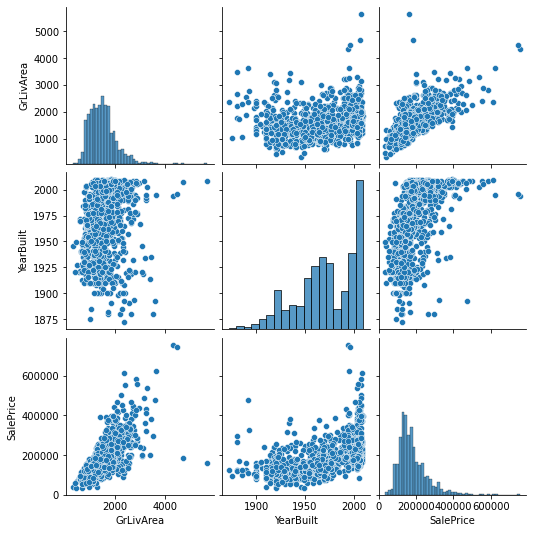

In [106]:
sns.pairplot(df)
plt.show()

In [107]:
X = df.loc[:,['GrLivArea','YearBuilt']]
y = df.loc[:,'SalePrice']

In [108]:

X.head

<bound method NDFrame.head of       GrLivArea  YearBuilt
Id                        
1          1710       2003
2          1262       1976
3          1786       2001
4          1717       1915
5          2198       2000
...         ...        ...
1456       1647       1999
1457       2073       1978
1458       2340       1941
1459       1078       1950
1460       1256       1965

[1460 rows x 2 columns]>

In [109]:
X.shape, y.shape

((1460, 2), (1460,))

# [Problem 2] Estimation and evaluation by linear regression

In [110]:
## Preprocessing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 2), (365, 2), (1095,), (365,))

In [111]:
# Pretreatment/ Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# Learning and Estimation
reg = LinearRegression()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)


In [113]:
# Estimation
mse = mean_squared_error(y_test, y_preds)
print("MSE Linear Regression: {:,.3f}".format(mse))

MSE Linear Regression: 2,314,465,092.732


In [114]:
reg.score(X_test, y_test)

0.6696127072424974

In [115]:
from sklearn.metrics import r2_score
print(f'R^2(coefficient of determination) Linear Regression: {r2_score(y_test, y_preds)}')

R^2(coefficient of determination) Linear Regression: 0.6696127072424974


In [116]:
# Visualization
def visualization(y_preds, title):
  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(12,5))
  ax1.scatter(X_test[:,0], y_test)
  ax1.scatter(X_test[:,0], y_preds, c='red')
  classes = ["actual","predicted"]
  ax1.legend(labels=classes)
  ax1.set(title="Scatterplot of house price based on GrLivArea", xlabel="GrLiArea", ylabel = "house price")

  ax2.scatter(X_test[:,1], y_test)
  ax2.scatter(X_test[:,1], y_preds, c='red')
  ax2.legend(labels=classes)
  ax2.set(title="Scatterplot of house price based on year built", xlabel="Year built", ylabel = "House Price")

  fig.suptitle(title, fontsize=16, fontweight= 'bold');

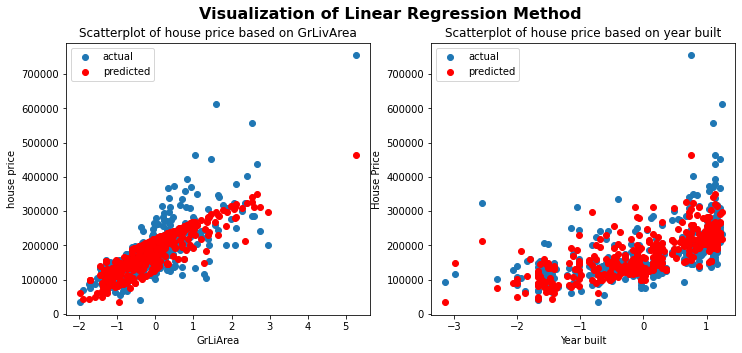

In [117]:
visualization(y_preds, "Visualization of Linear Regression Method")

# [Problem 3] Comparison of methods

In [118]:
# SVM(Support vector Machine)
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_preds_svr = svr_reg.predict(X_test)

In [119]:
mse_svr = mean_squared_error(y_test, y_preds_svr)
print("MSE SVR: {:,.3f}".format(mse_svr))

MSE SVR: 7,169,223,057.830


In [120]:
print(f'R^2 score SVM: {r2_score(y_test, y_preds_svr)}')

R^2 score SVM: -0.023398540202243634


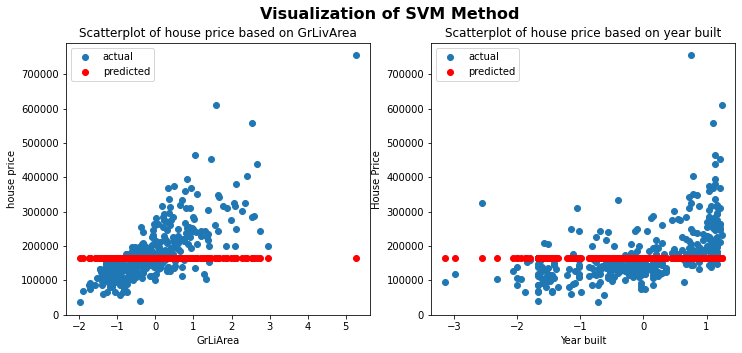

In [121]:
visualization(y_preds_svr, "Visualization of SVM Method")

In [122]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_preds_rf = rf_reg.predict(X_test)

In [123]:
mse_rf = mean_squared_error(y_test, y_preds_rf)
print("MSE Random Forest: {:,.3f}".format(mse_rf))

MSE Random Forest: 1,586,092,233.425


In [124]:
print(f'R^2 score Random Forest: {r2_score(y_test, y_preds_rf)}')

R^2 score Random Forest: 0.7735871149189002


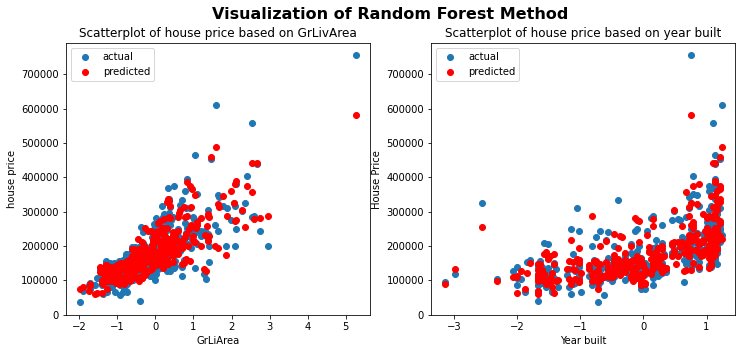

In [125]:
visualization(y_preds_rf, "Visualization of Random Forest Method")

In [126]:
# Common imports
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_preds_dt = dt_reg.predict(X_test)

In [127]:
mse_dt = mean_squared_error(y_test, y_preds_dt)
print("MSE Decision Tree: {:,.3f}".format(mse_dt))

MSE Decision Tree: 2,370,774,971.630


In [128]:

print(f'R^2 score Decision Tree: {r2_score(y_test, y_preds_dt)}')

R^2 score Decision Tree: 0.6615745352678258


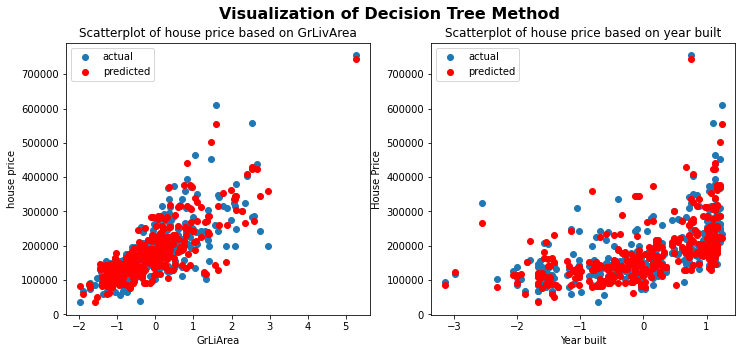

In [129]:
visualization(y_preds_dt, "Visualization of Decision Tree Method")

| Model              	| Linear Regression  	| SVM                   	| Decision Tree      	| Random Forest      	|
|--------------------	|--------------------	|-----------------------	|--------------------	|--------------------	|
| mean_squared_error 	| 2,314,465,092.732  	| 7,169,223,057.830     	| 1,679,070,718.252  	| 2,398,700,877.894  	|
| r2_score           	| 0.6696127072424974 	| -0.023398540202243634 	| 0.7603145406280909 	| 0.6575881435105095 	|